In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyute as ut
import size_contrast_analysis as sca
import pdb
import opto_utils
import os
from importlib import reload
import extract_with_classifier as ewc
import naka_rushton_analysis as nra
from importlib import reload
import scipy.stats as sst
import sim_utils
%matplotlib notebook

/Users/dan/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [39]:
def gen_nub_selector(run=False):
    selector = {}
    if run:
        selector['running'] = lambda x: x
    else:
        selector['running'] = lambda x: np.logical_not(x)
    selector['stimulus_size_deg'] = 0
    selector['stimulus_contrast'] = 0
    selector['stimulus_direction_deg'] = 0
    return selector

def gen_ret_nub_selector(run=False):
    selector = {}
    if run:
        selector['running'] = lambda x: x
    else:
        selector['running'] = lambda x: np.logical_not(x)
    selector['stimulus_location_y_deg'] = 0
    selector['stimulus_location_x_deg'] = 0
    return selector

In [4]:
nbefore,nafter = 8,8
nsize,ncontrast,nori,ntrials = 6,6,8,10

In [5]:
def get_trialwise_data(trialwise,expt,ipart,irois=None,irun=0,nparams=(nsize,ncontrast,nori,ntrials)):
    if irois is None:
        return trialwise[irun].loc[expt,ipart].to_numpy().reshape((-1,)+nparams)
    else:
        return trialwise[irun].loc[expt,ipart].iloc[irois].to_numpy().reshape((-1,)+nparams)

def compute_pref_angle(data,based_on='all'):
    data_mean = np.nanmean(np.nanmean(np.nanmean(data,1),1),-1)
    pref_angle = np.argmax(data_mean,axis=1)
    return pref_angle

def compute_pref_angle_trialwise(data,based_on='all'):
    data_mean = np.nanmean(np.nanmean(np.nanmean(np.nanmean(data,1),1),-1),-1)
    pref_angle = np.argmax(data_mean,axis=1)
    return pref_angle

def align_to_angle(data,pref_angle):
    output = np.zeros_like(data)
    nangle = data.shape[3]
    for iroi in range(data.shape[0]):
        slicer = list(np.arange(pref_angle[iroi],nangle))+list(np.arange(0,pref_angle[iroi]))
        output[iroi] = data[iroi][:,:,slicer]
    return output

def align_to_pref_angle(data):
    pref_angle = compute_pref_angle(data)
    output = align_to_angle(data,pref_angle)
    return output

def align_to_pref_angle_trialwise(data):
    pref_angle = compute_pref_angle_trialwise(data)
    output = align_to_angle(data,pref_angle)
    return output

In [6]:
dsbase = '/Users/dan/Documents/notebooks/mossing-PC/shared_data/'
dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','sst_l23','vip_l23','pv_l23']]

In [33]:
expt_type = 'size_contrast_0'
stim_params = ['stimulus_size_deg','stimulus_contrast', 'stimulus_direction_deg']
modal_uparam = [np.array((5,8,13,22,36,60)),np.array((0,0.06,0.12,0.25,0.5,1)),np.arange(0,360,45)]


In [36]:
# for dsfile in dsnames:
#     with ut.hdf5read(dsfile) as ds:
#         for exptname in ds.keys():
#             if 'size_contrast_0' in ds[exptname]:
#                 print(list(ds[exptname]['size_contrast_0']['stim_offset_deg']))
#                 xmean = int(ds[exptname]['retinotopy_0']['stimulus_location_x_deg'][:].mean())
#                 ymean = int(ds[exptname]['retinotopy_0']['stimulus_location_y_deg'][:].mean())
#                 print([xmean,ymean])
#                 print('')

[5, 8]
[8, 8]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[8, 0]
[8, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[-12, -5]
[-12, -5]

[5, -8]
[0, -8]

[8, 5]
[8, 5]

[-4, 2]
[-4, 2]

[8, 0]
[8, 0]

[0, -3]
[0, -3]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[-5, 0]
[-5, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[4, 0]
[4, 0]

[4, 0]
[4, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[-10, 0]
[-10, 0]

[-8, -8]
[-8, 0]

[-8, 0]
[-8, 0]

[8, -8]
[8, -8]

[0, 0]
[0, 0]

[4, 0]
[4, 0]

[8, 0]
[8, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[-5, 5]
[0, 0]

[8, 0]
[0, 0]

[-15, 5]
[0, 0]

[5, 5]
[0, 0]

[-5, 0]
[0, 0]

[0, 0]
[0, 0]

[0.0, -7.5]
[0, 0]

[-8, 0]
[-8, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[0, 0]
[0, 0]

[4, 0]
[4, 0]

[0, 0]
[0, 0]

[-8, 0]
[-8, 0]

[0, 0]
[0, 0]

[-4, 0]
[-4, 0]

[-8, 0]
[-8, 0]

[-8, 0]
[-8, 0]



In [66]:
reload(opto_utils)

dcutoff = 11

return_dict = True

to_exclude = ['session_'+exptname for exptname in ['180714_M9053','180321_M7955', '180519_M8959', '180531_M8961', '180618_M8956','190202_M10075', '190620_M10619']]

# output: neurons x locomotion x size x contrast x orientation x trials
# or, in the case of retinotopy
# output: neurons x locomotion x Y location x X location x trials


def extract_trialwise_data(dsnames, expt_type, stim_params, modal_uparam, gen_selector=gen_nub_selector):

    sco_big_aligned_trialwise,sco_big_misaligned_trialwise = [[None for itype in range(5)] for _ in range(2)]
    neuron_ids_aligned,neuron_ids_misaligned,run_speed_trialwise = [[None for itype in range(5)] for _ in range(3)]

    for itype,dsfile in enumerate(dsnames):
        if True:

            run_fn = lambda x: x[:,nbefore:-nafter].mean(-1)>1 # 1 cm/sec running cutoff
            df,roi_info,trial_info = ut.compute_tavg_dataframe(dsfile,expttype=expt_type,run_fn=run_fn)
            run_fn = lambda x: x[:,nbefore:-nafter].mean(-1) # 1 cm/sec running cutoff
            _,_,run_info = ut.compute_tavg_dataframe(dsfile,expttype=expt_type,run_fn=run_fn)

            displacement = opto_utils.extract_fit_displacement(dsfile,expttype=expt_type)

            train_test = [None for irun in range(2)]
            reload(ut)
            for irun in range(2):
                selector = gen_selector(run=irun)
                train_test[irun] = ut.select_trials(trial_info,selector,0.5,include_all=True)
                for key in train_test[irun]:
                    train_test[irun][key].append(train_test[irun][key][2])#train_test[irun][key][0] | train_test[irun][key][1])

            reload(ut)
            trialwise = [None for irun in range(2)]
            run_speed = [None for irun in range(2)]
            for irun in range(2):
                trialwise[irun] = ut.compute_tuning_trialwise_df(df,trial_info,selector,include=train_test[irun],return_dict=return_dict)
                run_speed[irun] = ut.get_key_trialwise(run_info,'running',trial_info,selector,include=train_test[irun])

            sco_big_aligned_trialwise[itype],sco_big_misaligned_trialwise[itype] = [[None for irun in range(2)] for _ in range(2)]
            neuron_ids_aligned[itype],neuron_ids_misaligned[itype],run_speed_trialwise[itype] = [[None for irun in range(2)] for _ in range(3)]

            shp = tuple([len(uparam) for uparam in modal_uparam])
            
            for irun in range(2):
                sco_big_aligned_trialwise[itype][irun] = np.zeros((0,)+shp+(ntrials,))
                sco_big_misaligned_trialwise[itype][irun] = np.zeros((0,)+shp+(ntrials,))
                run_speed_trialwise[itype][irun] = np.zeros((0,)+shp+(ntrials,))
                neuron_ids_aligned[itype][irun],neuron_ids_misaligned[itype][irun] = [np.zeros((0,2)) for _ in range(2)]
                for iexpt,expt in enumerate(list(trial_info.keys())):
                    if not expt in to_exclude:
                        this_uparam = [np.unique(trial_info[expt][key]) for key in stim_params]
                        if expt_type == 'retinotopy_0':
                            # in the case of retinotopic mapping data, align the stimuli to the center of the size-
                            # contrast stimulus
                            with ut.hdf5read(dsfile) as ds:
                                stim_offset_deg = ds[expt]['size_contrast_0']['stim_offset_deg'][:]
                            this_uparam[0] = this_uparam[0] - stim_offset_deg[1] # subtract y-value of stim offset
                            this_uparam[1] = this_uparam[1] - stim_offset_deg[0] # subtract x-value of stim offset
                        nparams = tuple([len(tu) for tu in this_uparam])
                        this_ntrials = int(len(trial_info[expt][stim_params[0]])/np.prod(nparams))

                        if not return_dict:
                            data = [get_trialwise_data(trialwise,expt,ipart,irun=irun,nparams=nparams+(this_ntrials,)) for ipart in range(3)]
                            scalls = [data[ipart] for ipart in range(3)]

                        centered = np.sqrt(np.sum(displacement[expt]**2,1))<dcutoff

                        ipart = 2

                        roilist = np.arange(centered.shape[0])
                        exptid = iexpt*np.ones((centered.shape[0],))
                        these_neuron_ids = np.concatenate((exptid[:,np.newaxis],roilist[:,np.newaxis]),axis=1)

                        ipart = 2

#                         def concat_these(source_data,to_concat,cell_include):
#                             this_data = source_data[cell_include]
#                             nan_padded = np.nan*np.ones((this_data.shape[0],) + shp + (ntrials,))
#                             sim_utils.assign_from_uparam(nan_padded[:,:,:,:,:this_data.shape[4]],modal_uparam,this_data,this_uparam)
#                             to_concat = np.concatenate((to_concat,nan_padded),axis=0)
#                             return to_concat
                        
                        def pad_nans(this_data):
                            shp = tuple([len(uparam) for uparam in modal_uparam])
                            nan_padded = np.nan*np.ones((this_data.shape[0],) + shp + (ntrials,))
                            slicer = [slice(None) for _ in range(len(nan_padded.shape))]
                            slicer[-1] = slice(None, this_data.shape[-1]) # fill in only up to the number of trials present
                            sim_utils.assign_from_uparam(nan_padded[slicer],modal_uparam,this_data,this_uparam)
                            return nan_padded

                        cell_include = centered
                        if not return_dict:
                            this_data = scalls[ipart]#[cell_include]
                            nan_padded = pad_nans(this_data)
                            sco_big_aligned_trialwise[itype][irun] = np.concatenate((sco_big_aligned_trialwise[itype][irun],nan_padded),axis=0)
                        else:
                            this_data = trialwise[irun][expt][ipart]
                            nan_padded = pad_nans(this_data)
                            sco_big_aligned_trialwise[itype][irun] = np.concatenate((sco_big_aligned_trialwise[itype][irun],nan_padded),axis=0)                    
                        neuron_ids_aligned[itype][irun] = np.concatenate((neuron_ids_aligned[itype][irun],these_neuron_ids[cell_include]),axis=0)

                        cell_include = ~centered
                        if not return_dict:
                            this_data = scalls[ipart]#[cell_include]
                            nan_padded = pad_nans(this_data)
                            sco_big_misaligned_trialwise[itype][irun] = np.concatenate((sco_big_misaligned_trialwise[itype][irun],nan_padded),axis=0)
                        else:
                            this_data = trialwise[irun][expt][ipart]
                            nan_padded = pad_nans(this_data)
                            sco_big_misaligned_trialwise[itype][irun] = np.concatenate((sco_big_misaligned_trialwise[itype][irun],nan_padded),axis=0)
                        neuron_ids_misaligned[itype][irun] = np.concatenate((neuron_ids_misaligned[itype][irun],these_neuron_ids[cell_include]),axis=0)

                        this_data = run_speed[irun][expt][ipart]
                        nan_padded = pad_nans(this_data)
                        run_speed_trialwise[itype][irun] = np.concatenate((run_speed_trialwise[itype][irun],nan_padded),axis=0)

            sco_big_aligned_trialwise[itype] = np.concatenate([sc[:,np.newaxis] for sc in sco_big_aligned_trialwise[itype]],axis=1)
            sco_big_misaligned_trialwise[itype] = np.concatenate([sc[:,np.newaxis] for sc in sco_big_misaligned_trialwise[itype]],axis=1)
            neuron_ids_aligned[itype] = neuron_ids_aligned[itype][0]
            neuron_ids_misaligned[itype] = neuron_ids_misaligned[itype][0]
            run_speed_trialwise[itype] = np.concatenate([sc[:,np.newaxis] for sc in run_speed_trialwise[itype]],axis=1)
    to_return = (sco_big_aligned_trialwise, 
                 sco_big_misaligned_trialwise, 
                 neuron_ids_aligned, 
                 neuron_ids_misaligned, 
                 run_speed_trialwise)
    return to_return

In [51]:
expt_type = 'size_contrast_0'
stim_params = ['stimulus_size_deg','stimulus_contrast', 'stimulus_direction_deg']
modal_uparam = [np.array((5,8,13,22,36,60)),np.array((0,0.06,0.12,0.25,0.5,1)),np.arange(0,360,45)]

sco_big_aligned_trialwise, \
sco_big_misaligned_trialwise, \
neuron_ids_aligned, \
neuron_ids_misaligned, \
run_speed_trialwise = extract_trialwise_data(dsnames, expt_type, stim_params, modal_uparam)

<HDF5 group "/session_181127_M10073" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190202_M10075" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190304_M10077" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190607_M10443" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190620_M10616" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190620_M10619" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:88: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_181205_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181209_M8536" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181213_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181214_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190102_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190128_M8982" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:88: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_180713_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180714_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180802_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180821_M9417" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181117_M10039" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181120_M10039" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cel

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:88: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_180321_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']
<HDF5 group "/session_180412_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180516_M8956" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180519_M8959" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180528_M8959" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180531_M8961" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_grou

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:88: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_191105_M0589" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red_channel_corrected', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_191220_M0589" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red_channel_corrected', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_191229_M0892" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red_channel_corrected', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_200102_M0892" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:88: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

In [56]:
expt_type = 'retinotopy_0'
stim_params = ['stimulus_location_y_deg','stimulus_location_x_deg']
modal_uparam = [np.arange(-20,25,5),np.arange(-20,25,5)]

ret_big_aligned_trialwise, \
ret_big_misaligned_trialwise, \
ret_neuron_ids_aligned, \
ret_neuron_ids_misaligned, \
ret_run_speed_trialwise = extract_trialwise_data(dsnames, 
                                                 expt_type, 
                                                 stim_params, 
                                                 modal_uparam,
                                                gen_selector=gen_ret_nub_selector)

<HDF5 group "/session_181127_M10073" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190202_M10075" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190304_M10077" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190607_M10443" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190620_M10616" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190620_M10619" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:89: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_181205_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181209_M8536" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181213_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181214_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190102_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_190128_M8982" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:89: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_180713_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180714_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180802_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180821_M9417" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181117_M10039" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_181120_M10039" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cel

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:89: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_180321_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']
<HDF5 group "/session_180412_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180516_M8956" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180519_M8959" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180528_M8959" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_180531_M8961" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_grou

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:89: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

<HDF5 group "/session_191105_M0589" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red_channel_corrected', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_191220_M0589" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red_channel_corrected', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_191229_M0892" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red_channel_corrected', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
<HDF5 group "/session_200102_M0892" (12 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mean_green_channel', 'mean_green_channel_enhanced', 'mean_red_channel', 'mean_red

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:89: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/dan/Documents/code/adesnal/sim_utils.py:581: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:587: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an er

In [60]:
ret_neuron_ids_aligned[0][0]
neuron_ids_aligned[0][0]

array([0., 1.])

In [61]:
save_dicti = {'celltype_lbls':['L4 PC','L2/3 PC','SST','VIP','PV'],
              'rs_axis_lbls':['neuron','running','size','contrast','direction','trial'],
              'run_speed_axis_lbls':['expt','running','size','contrast','direction','trial'],
              'neuron_ids_axis_lbls':['expt','neuron'],
              'rstrial_aligned':sco_big_aligned_trialwise,
              'rstrial_misaligned':sco_big_misaligned_trialwise,
              'neuron_ids_aligned':neuron_ids_aligned,
              'neuron_ids_misaligned':neuron_ids_misaligned,
              'run_speed_trialwise':run_speed_trialwise,
              'ret_rstrial_aligned':ret_big_aligned_trialwise,
              'ret_rstrial_misaligned':ret_big_misaligned_trialwise,
              'ret_neuron_ids_aligned':ret_neuron_ids_aligned,
              'ret_neuron_ids_misaligned':ret_neuron_ids_misaligned,
              'ret_run_speed_trialwise':ret_run_speed_trialwise}
np.save('celltype_trialwise_data.npy',save_dicti,allow_pickle=True)


In [67]:
ret_big_aligned_trialwise[0].shape

(12939, 2, 9, 9, 10)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


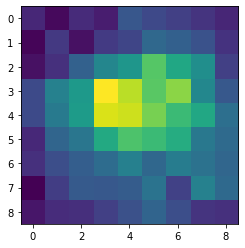

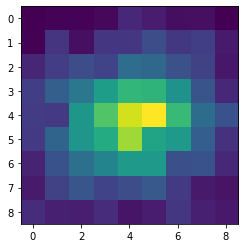

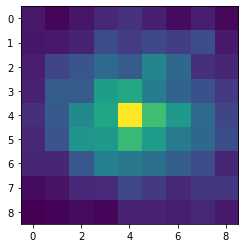

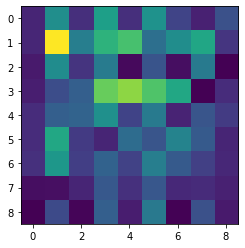

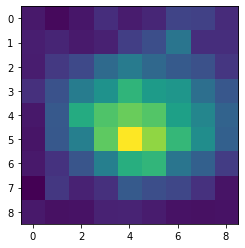

In [70]:
for itype in range(5):
    plt.figure()
    plt.imshow(np.nanmean(np.nanmean(np.nanmean(ret_big_aligned_trialwise[itype],0),0),-1))